# GO analysis notebook
- From the differential expression, report any significant genes (in this case, we just use anything that changed significantly regardless of cutoff...). 
- Perform GO manually (using geneontology.org and all chicken genes as background)
- Combine conditions and create a heatmap.

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [124]:
wd = '/home/bay001/projects/kes_20160307/permanent_data/10-11-2016/'


In [125]:
# lets do sccp_vs_control first

In [126]:
sccp_vs_control = pd.read_table(os.path.join(wd,'SCCP_vs_CONTROL/diffexp.annotated.csv'),sep=',')
sccp_vs_control_female = pd.read_table(os.path.join(wd,'SCCP_vs_CONTROL_FEMALE/diffexp.annotated.csv'),sep=',')
sccp_vs_control_male = pd.read_table(os.path.join(wd,'SCCP_vs_CONTROL_MALE/diffexp.annotated.csv'),sep=',')

tbbpa_vs_control = pd.read_table(os.path.join(wd,'TBBPA_vs_CONTROL/diffexp.annotated.csv'),sep=',')
tbbpa_vs_control_female = pd.read_table(os.path.join(wd,'TBBPA_vs_CONTROL_FEMALE/diffexp.annotated.csv'),sep=',')
tbbpa_vs_control_male = pd.read_table(os.path.join(wd,'TBBPA_vs_CONTROL_MALE/diffexp.annotated.csv'),sep=',')

conditions = {'sccp_vs_control':sccp_vs_control, 'sccp_vs_control_female':sccp_vs_control_female, 'sccp_vs_control_male':sccp_vs_control_male, 
              'tbbpa_vs_control':tbbpa_vs_control, 'tbbpa_vs_control_female':tbbpa_vs_control_female, 'tbbpa_vs_control_male':tbbpa_vs_control_male}
             

In [127]:
padj_cutoff = 0.05
fold_change_cutoff = 0
genelist = {}
for condition, df in conditions.iteritems():
    filtered = df[(df['padj'].replace('-',1).astype(float)< padj_cutoff) & 
                  (abs(df['log2FoldChange'].replace('-',0).astype(float)) > fold_change_cutoff)]
    filtered_genes = set(filtered[filtered['Unnamed: 0'].str.contains("ENSGALG")]['Unnamed: 0'])
    filtered_all = set(filtered['Unnamed: 0'])
    print("cond: {}, number of named genes: {}, number of all genes: {}".format(condition, len(filtered_genes), len(filtered_all)))
    genelist[condition] = filtered_genes
    pd.DataFrame(pd.Series(list(filtered_genes))).to_csv(os.path.join(wd,"GO_ANALYSIS/{}.go.nocutoff.txt".format(condition)),
                                                        sep='\t',index=None,header=None) # ¯\_(ツ)_/¯

cond: sccp_vs_control_female, number of named genes: 36, number of all genes: 98
cond: sccp_vs_control_male, number of named genes: 197, number of all genes: 317
cond: tbbpa_vs_control, number of named genes: 37, number of all genes: 68
cond: tbbpa_vs_control_male, number of named genes: 117, number of all genes: 259
cond: tbbpa_vs_control_female, number of named genes: 16, number of all genes: 50
cond: sccp_vs_control, number of named genes: 1151, number of all genes: 1825


# create a GO graph

In [128]:
analyzed = ! ls $wd/GO_ANALYSIS/*male*.analyzed.txt
dfx = pd.DataFrame()
for analyze in analyzed:
    df = pd.read_table(analyze,skiprows=11,index_col=0)
    dfy = pd.DataFrame(df['upload_1 (fold Enrichment)'])
    dfy.columns = [os.path.basename(analyze).replace('.go.nocutoff.analyzed.txt','')]
    dfx = pd.merge(dfx,dfy,how='outer',left_index=True,right_index=True)
dfx.fillna(0)

,sccp_vs_control_female,sccp_vs_control_male,tbbpa_vs_control_female,tbbpa_vs_control_male
GO biological process complete,,,,
Unclassified (UNCLASSIFIED),0.37,0.55,0.85,0.85
amide biosynthetic process (GO:0043604),13.67,3.91,0.00,0.00
cellular amide metabolic process (GO:0043603),10.17,0.00,0.00,0.00
negative regulation of endopeptidase activity (GO:0010951),0.00,0.00,0.00,8.95
negative regulation of peptidase activity (GO:0010466),0.00,0.00,0.00,8.58
organonitrogen compound biosynthetic process (GO:1901566),7.45,3.06,0.00,0.00
organonitrogen compound metabolic process (GO:1901564),4.90,0.00,0.00,0.00
peptide biosynthetic process (GO:0043043),15.81,4.52,0.00,0.00
peptide metabolic process (GO:0006518),12.12,3.68,0.00,0.00


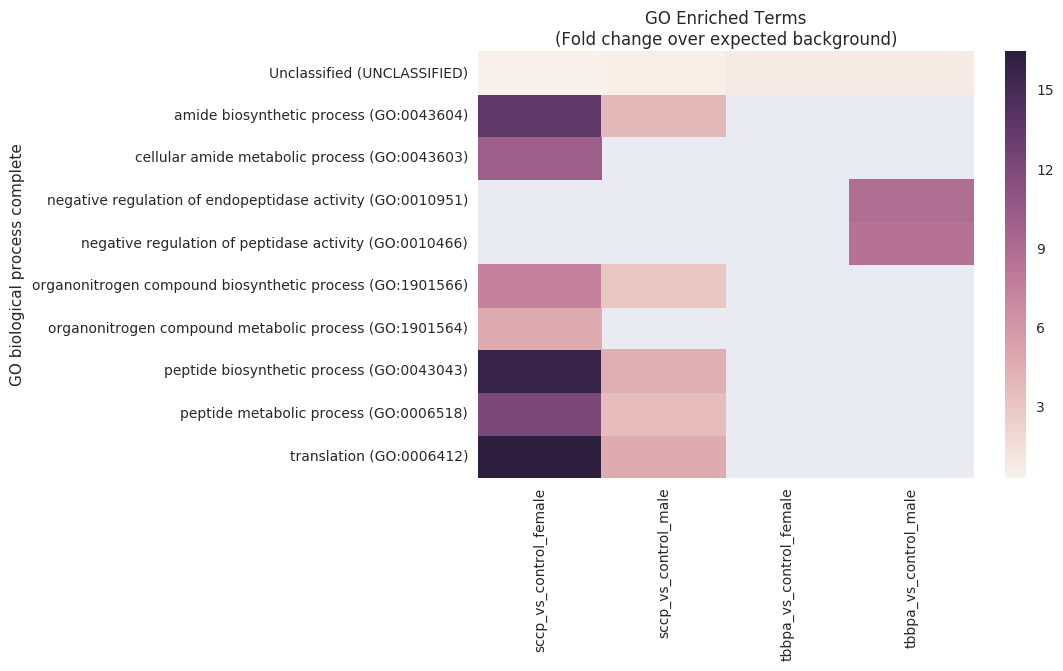

In [139]:
colors = (sns.color_palette("BuPu",4))
sns.heatmap(dfx)
plt.title("GO Enriched Terms\n(Fold change over expected background)")

In [121]:
dfx

,sccp_vs_control_female,sccp_vs_control_male,tbbpa_vs_control_female,tbbpa_vs_control_male
GO biological process complete,,,,
Unclassified (UNCLASSIFIED),0.37,0.55,0.85,0.85
amide biosynthetic process (GO:0043604),13.67,3.91,NaN,NaN
cellular amide metabolic process (GO:0043603),10.17,NaN,NaN,NaN
negative regulation of endopeptidase activity (GO:0010951),NaN,NaN,NaN,8.95
negative regulation of peptidase activity (GO:0010466),NaN,NaN,NaN,8.58
organonitrogen compound biosynthetic process (GO:1901566),7.45,3.06,NaN,NaN
organonitrogen compound metabolic process (GO:1901564),4.90,NaN,NaN,NaN
peptide biosynthetic process (GO:0043043),15.81,4.52,NaN,NaN
peptide metabolic process (GO:0006518),12.12,3.68,NaN,NaN
